In [103]:
from sympy.solvers import solve
from sympy import symbols, simplify#, abs
from cmath import phase
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [92]:
vo, vr, vc, vl, vi, i, r, c, l, omega = symbols("vo vr vc vl vi i r c l omega")

In [93]:
eq1_LP = (vo-vc,
 vr+vc-vi,
 vc - i/(1j*omega*c),
 vr - i*r)

eq1_HP = (vo-vr,
 vr+vc-vi,
 vc - i/(1j*omega*c),
 vr - i*r)

eq2_LP = (vo-vc,
 vc+vl+vr-vi,
 vc - i/(1j*omega*c),
 vr - i*r,
 vl - 1j*omega*l*i)

eq2_HP = (vo-vl,
 vc+vl+vr-vi,
 vc - i/(1j*omega*c),
 vr - i*r,
 vl - 1j*omega*l*i)


In [95]:
sol1_LP = solve(eq1_LP, (vo, vr, vc, i))
sol1_HP = solve(eq1_HP, (vo, vr, vc, i))
sol2_LP = solve(eq2_LP, (vo, vr, vc, vl, i))
sol2_HP = solve(eq2_HP, (vo, vr, vc, vl, i))
H1_LP = simplify(sol1_LP[vo])/vi #transfer function of RC LP
H1_HP = simplify(sol1_HP[vo])/vi #transfer function of RC HP
H2_LP = simplify(sol2_LP[vo])/vi
H2_HP = simplify(sol2_HP[vo])/vi
print(H1_LP)
print(H1_HP)
print(H2_LP)
print(H2_HP)

-I/(c*omega*r - I)
c*omega*r/(c*omega*r - I)
-I/(I*c*l*omega**2 + c*omega*r - I)
I*c*l*omega**2/(I*c*l*omega**2 + c*omega*r - I)


In [153]:
#1st order RC circuit
def plot1(eq,C=.01e-6,R=15e3,L=0): #cc1 and cc2 are circuit components
    numvalue = {c:C, r:R, l:L} #.01e-6. 15e3
    cutoff = 1/(numvalue[c]*numvalue[r]) #cutoff angular frequency
    print('cutoff = ', cutoff)
    Hnum = eq.subs(numvalue) #substitute c and r numvalue
    w = np.linspace(1, 1000000, 1000) #angular frequency list
    w_axis = np.log10(w/cutoff)
    vos_abs = [abs(Hnum.subs({omega: o})) for o in w]
    abs_axis = 20*np.log10(np.array(vos_abs, dtype=np.float64))
    phase_axis = [phase(Hnum.subs({omega: o})) for o in w]


    plt.plot(w_axis, abs_axis)
    plt.xlabel('Log(w/wc)')
    plt.ylabel('|H| in dB')
    plt.title('Bode Amplitude Plot')
    plt.xlim(-2,2)
    plt.yticks(np.array([0,-20,-40]))
    plt.ylim(-41,5)
    plt.grid(True)
    plt.show()

    plt.plot(w_axis, phase_axis)
    plt.xlabel('Log(w/wc)')
    plt.ylabel('Phase in radians')
    plt.title('Bode Phase Plot')
    plt.xlim(-2,2)
    plt.show()

1st Order Low Pass RC Circuit
cutoff =  6666.666666666666


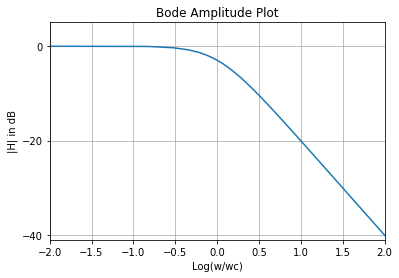

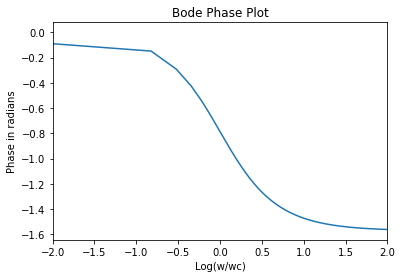

1st Order High Pass RC Circuit
cutoff =  6666.666666666666


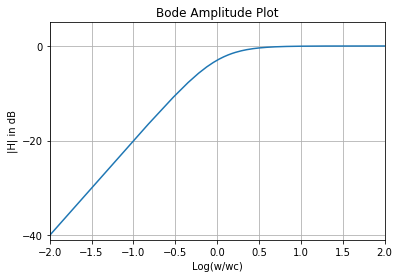

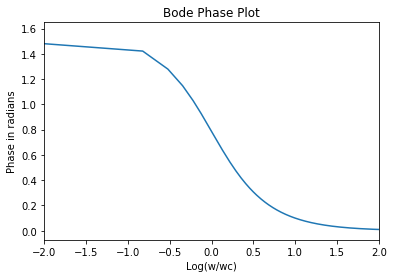

In [154]:
print('1st Order Low Pass RC Circuit')
plot1(H1_LP)
print('1st Order High Pass RC Circuit')
plot1(H1_HP)

In [135]:
#2nd order RLC circuit

def plot2(eq,C=1e-9,L=1e-3):
    numvalue = {c:C, l:L} 
    Hnum = eq.subs(numvalue) #substitute c and l numvalue
    dlist = [0.4,0.6,0.7,1.0] #set d values
    Qlist = []
    Rlist = []
    for d in dlist:
        Q = 1/(2*d) #solves for Q
        R = 1/Q*np.sqrt(L/C) #solves for R
        Rlist.append(R)
        Qlist.append(Q)
    Hnum = [Hnum.subs({r:R})for R in Rlist] #substitute r value
    print('Q=', Qlist,'and R=', Rlist)
    w = np.linspace(10000, 50000000, 500) #angular frequency list 50000000 500
    wo = 1/(np.sqrt(1e-9*1e-3))
    print('undamped resonant frequency = ', wo)
    w_axis = np.log10(w/wo)
    vos_abs = [[abs(h.subs({omega: o})) for o in w]
                                        for h in Hnum]
    abs_axis = 20*np.log10(np.array(vos_abs, dtype=np.float64))
    phase_axis = [[phase(h.subs({omega: o})) for o in w]
                                             for h in Hnum]

    plt.plot(w_axis, abs_axis[0],label='d=0.4')
    plt.plot(w_axis, abs_axis[1],label='d=0.6')
    plt.plot(w_axis, abs_axis[2],label='d=0.7')
    plt.plot(w_axis, abs_axis[3],label='d=1.0')
    plt.xlim(-2,1.6)
    plt.yticks(np.array([0,-20,-40,-60]))
    plt.xlabel('Log(w/wc)')
    plt.ylabel('|H| in dB')
    plt.title('Bode Amplitude Plot')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    plt.plot(w_axis, phase_axis[0],label='d=0.4')
    plt.plot(w_axis, phase_axis[1],label='d=0.6')
    plt.plot(w_axis, phase_axis[2],label='d=0.7')
    plt.plot(w_axis, phase_axis[3],label='d=1.0')
    plt.xlim(-2,1.6)
    plt.xlabel('Log(w/wc)')
    plt.ylabel('Phase in radians')
    plt.title('Bode Phase Plot')
    plt.legend()
    plt.show()

Low Pass Filter
Q= [1.25, 0.8333333333333334, 0.7142857142857143, 0.5] and R= [800.0, 1200.0, 1400.0, 2000.0]
undamped resonant frequency =  999999.9999999999


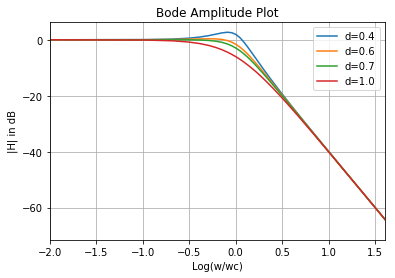

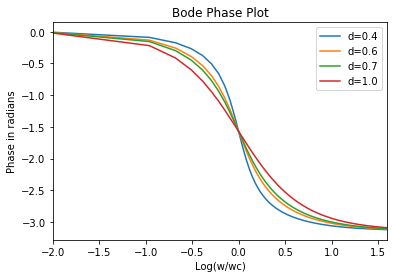

High Pass Filter
Q= [1.25, 0.8333333333333334, 0.7142857142857143, 0.5] and R= [800.0, 1200.0, 1400.0, 2000.0]
undamped resonant frequency =  999999.9999999999


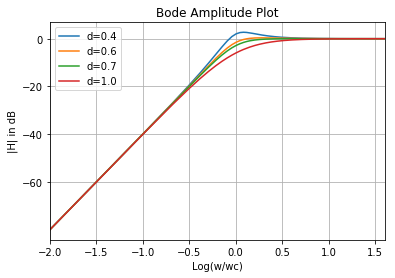

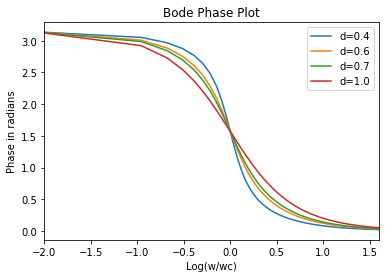

In [136]:
print('Low Pass Filter')
plot2(H2_LP)

print('High Pass Filter')
plot2(H2_HP)

In [59]:
#returns wave signal
def square(t,T=1,A=1):
    return A*signal.square(2 * np.pi * T * t)
def sawtooth(t,T=1,A=1):
    return A*signal.sawtooth(2 * np.pi * T * t, 0.5)
def sin(t,T=1,A=1):
    return A*np.sin(2 * np.pi * T * t)

In [60]:
#plot input waveform
def in_put(wave_eq,t=np.linspace(0,3,100)):
    plt.scatter(t, wave_eq(t))
    plt.axhline(0) # adds line at y = 0
    plt.xlabel('t/T')
    plt.ylabel('vo')
    plt.show()

In [61]:
#plot output waveform

fac=1
def out_put(wave_eq, circ_eq, fac, R, C=1e-9, L=1e-3, N=256.0, T=1):
    numvalue = {c:C, l:L, r:R} 
    vosnum = circ_eq.subs(numvalue)
    omegares = 1./np.sqrt(C*L)
    print('omegares=',omegares)
    alist = wave_eq(np.arange(N)*T/N)/np.sqrt(N)#input discrete voltage
    blist = np.sqrt(N) * np.fft.fft(alist)
    omegai = fac * omegares #input frequency
    #The metho is only valid for s=1...N/2, thus, we shift the higher frequencies to low negative ones.
    volist = np.concatenate(([complex(vosnum.subs({omega: omegai*s}).evalf()) for s in np.arange(1, 129)], [0.0],
                            [complex(vosnum.subs({omega: omegai*s}).evalf()) for s in np.arange(-127, 0)])) #output voltage
    vtrans = np.fft.ifft(blist * volist) #output signal
    plotlist = np.array([[(k)/256., vtrans[k%256]] for k in range(768)])
    plt.scatter(plotlist[:,0], plotlist[:,1],s=1.5)
    plt.axhline(0) # adds line at y = 0
    plt.xlabel('t/T')
    plt.ylabel('vo')
    plt.show()



omegares= 999999.9999999999


C:\Users\Mary\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


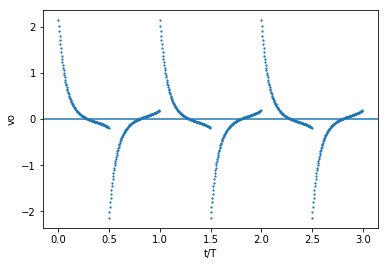

omegares= 999999.9999999999


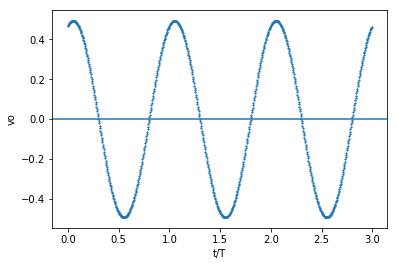

omegares= 999999.9999999999


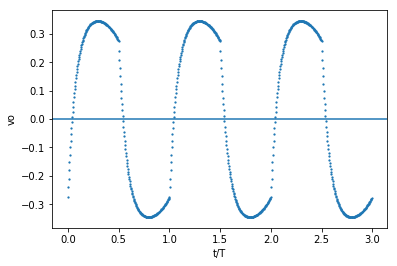

In [72]:
out_put(square, H2_HP,1,2700)
out_put(sin, H2_HP,1,2700)
out_put(sawtooth,H2_HP,1,2700)

omegares= 999999.9999999999


C:\Users\Mary\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


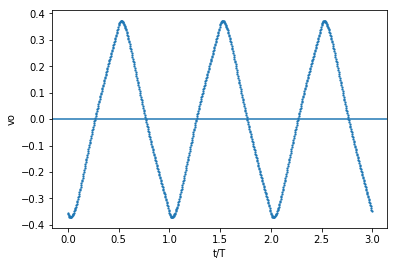

omegares= 999999.9999999999


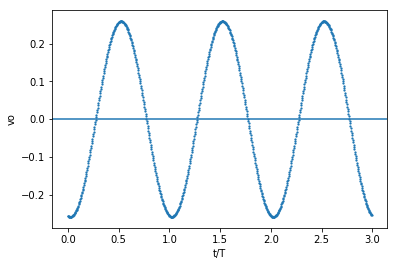

omegares= 999999.9999999999


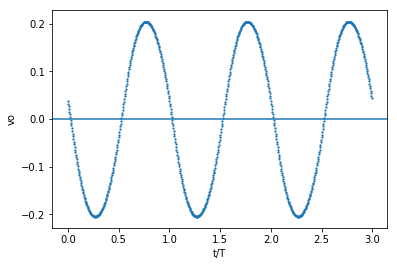

In [68]:
out_put(square, H2_LP,1,2700)
out_put(sin, H2_LP,1,2700)
out_put(sawtooth,H2_LP,1,2700)